In [6]:
# !pip install easyocr google-generativeai python-doctr transformers nougat-ocr sentencepiece python-Levenshtein

# Multimodal Models based OCR

**Google Gemini**
*https://ai.google.dev/gemini-api/docs/vision?lang=python*

In [10]:
import google.generativeai as genai
import base64
import typing_extensions as typing

genai.configure(api_key="GOOGLE_API_KEY")
model = genai.GenerativeModel("gemini-2.0-flash-exp")
with open("./data/Car_Plate_No.png", "rb") as image2string:
    converted_string = base64.b64encode(image2string.read()).decode('utf-8')
prompt = """
Perform ocr over the image and extract the id data.
"""
response = model.generate_content(
    [
        {
            'mime_type': 'image/jpeg',
            'data': converted_string
        },
        prompt
    ]
)

print("Image analysis output: \n", response.text)


Image analysis output: 
 CZ17 KOD


# easyOCR

In [11]:
import easyocr
import cv2


image_path = "./data/Car_Plate_No.png"
reader= easyocr.Reader(['en'], gpu=False)
result= reader.readtext(image_path)
print("Image analysis output: \n", result)

Using CPU. Note: This module is much faster with a GPU.


Image analysis output: 
 [([[137, 119], [263, 119], [263, 155], [137, 155]], 'Czi7 Kod', 0.3431997570497099)]


# doctr OCR

https://github.com/mindee/doctr

In [7]:
# import matplotlib.pyplot as plt
from doctr.io import DocumentFile
from doctr.models import ocr_predictor, from_hub

In [9]:
# model = from_hub('mindee/my-model')
predictor = ocr_predictor(det_arch='db_mobilenet_v3_large', reco_arch='crnn_vgg16_bn', pretrained=True, detect_orientation= True)

  0%|          | 0/16991778 [00:00<?, ?it/s]

C:\Users\pooja\AppData\Local\Programs\Python\Python311\Lib\site-packages\doctr\models\utils\pytorch.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.l

  0%|          | 0/63286381 [00:00<?, ?it/s]

  0%|          | 0/6233146 [00:00<?, ?it/s]

In [10]:
img = DocumentFile.from_images("./data/Car_Plate_No.png")
output = predictor(img)

In [11]:
print('Output of doctr: \n', output)

Output of doctr: 
 Document(
  (pages): [Page(
    dimensions=(267, 400)
    (blocks): [Block(
      (lines): [
        Line(
          (words): [
            Word(value='-', confidence=0.91),
            Word(value='-', confidence=0.99),
          ]
        ),
        Line(
          (words): [Word(value='-', confidence=0.88)]
        ),
        Line(
          (words): [
            Word(value='/', confidence=1.0),
            Word(value='-', confidence=0.94),
          ]
        ),
        Line(
          (words): [Word(value='-', confidence=0.97)]
        ),
        Line(
          (words): [Word(value='-', confidence=0.88)]
        ),
        Line(
          (words): [Word(value='-', confidence=0.77)]
        ),
        Line(
          (words): [Word(value='GB', confidence=0.99)]
        ),
        Line(
          (words): [
            Word(value='CZI7', confidence=0.99),
            Word(value='KOD', confidence=1.0),
          ]
        ),
      ]
      (artefacts): []
    )]
  

# TrOCR

In [2]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

**Inference on Printed Text**

In [36]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-printed")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-printed")

In [7]:
image = Image.open("./data/Printed_img.png").convert("RGB")
image.show()

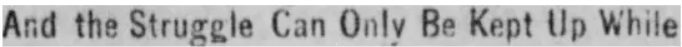

In [ ]:
pixel_values = processor(image, return_tensors="pt").pixel_values
print("TrOCR processor output:", pixel_values)

In [6]:
generated_ids = model.generate(pixel_values, max_length=100)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

In [8]:
print("Output of the TrOCR: \n", generated_text)

Output of the TrOCR: 
 AND THE STRUGGLE CAN ONLY BE KEPT UP WHILE


**Inference on handwritten text**

In [26]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-small-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-small-handwritten')

In [32]:
image = Image.open("./data/Handwritten_text2.jpg").convert("RGB")
image = image.resize((800, 150))
image.show()

Image size: 
 (1936, 219)


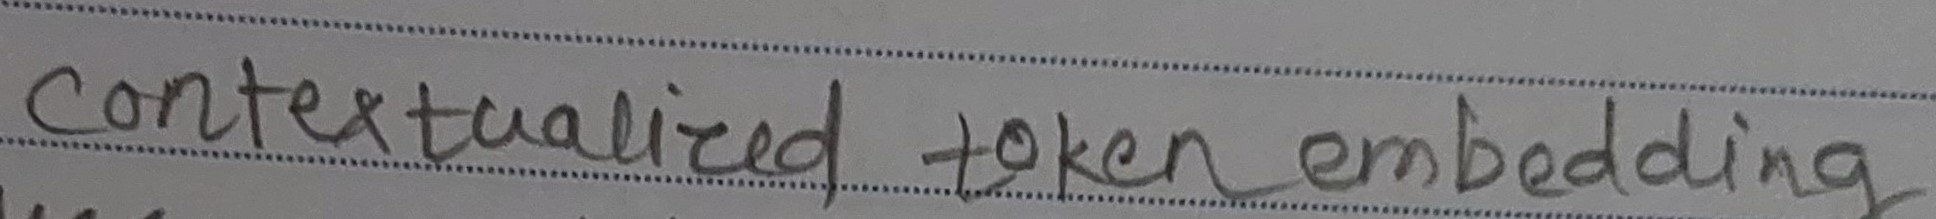

In [33]:
pixel_values = processor(image, return_tensors="pt").pixel_values
# print("TrOCR processor output:", pixel_values)

In [34]:
generated_ids = model.generate(pixel_values, max_length=512)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)

In [35]:
print("Output of the TrOCR: \n", generated_text)

Output of the TrOCR: 
 ['contextualized phenomedding']


**Inference on Scene text**

In [41]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-str')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-str')

In [38]:
url = 'https://i.postimg.cc/ZKwLg2Gw/367-14.png'
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
image.show()

In [39]:
pixel_values = processor(image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values, max_length=512)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)

In [40]:
print("Output of the TrOCR: \n", generated_text)

Output of the TrOCR: 
 ['TICKET']


# Nougat OCR Facebook

In [1]:
from transformers import NougatProcessor, VisionEncoderDecoderModel
from PIL import Image

In [9]:
processor = NougatProcessor.from_pretrained("facebook/nougat-small")
model = VisionEncoderDecoderModel.from_pretrained("facebook/nougat-small")

In [3]:
from huggingface_hub import hf_hub_download

filepath = hf_hub_download(repo_id="hf-internal-testing/fixtures_docvqa", filename="nougat_paper.png", repo_type="dataset")
image = Image.open(filepath)
pixel_values = processor(image, return_tensors="pt").pixel_values

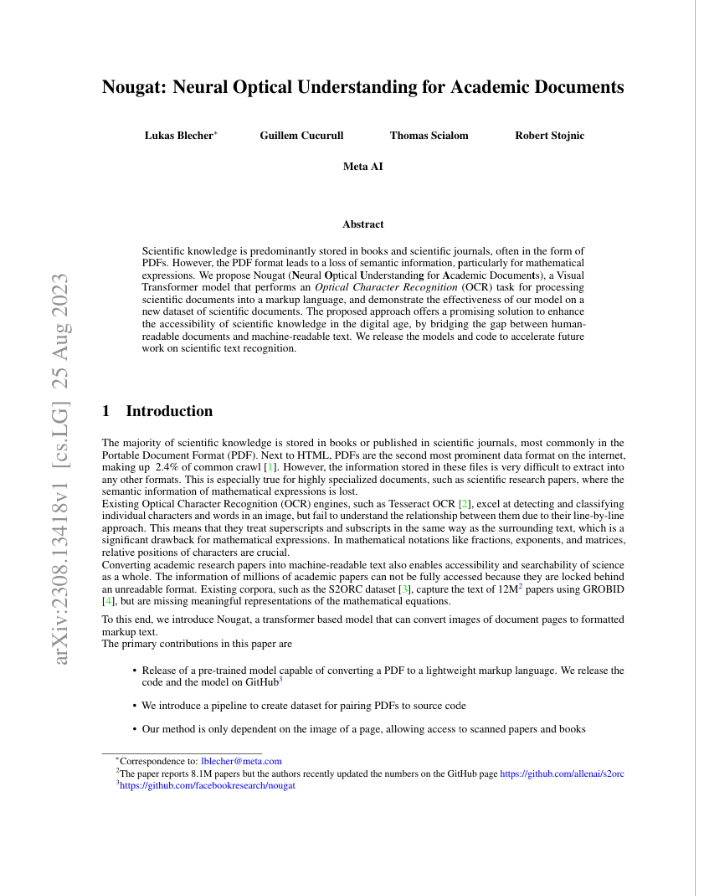

In [4]:
generated_ids = model.generate(pixel_values, max_length=1024,
    bad_words_ids=[[processor.tokenizer.unk_token_id]],
)

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

In [5]:
print("Output of nougat: \n", generated_text)

Output of nougat: 
 # Nougat: Neural Optical Understanding for Academic Documents

 Lukas Blecher

Correspondence to: lblecher@meta.com

Guillem Cucurull

Thomas Scialom

Robert Stojnic

Meta AI

The paper reports 8.1M papers but the authors recently updated the numbers on the GitHub page https://github.com/allenai/s2orc

###### Abstract

Scientific knowledge is predominantly stored in books and scientific journals, often in the form of PDFs. However, the PDF format leads to a loss of semantic information, particularly for mathematical expressions. We propose Nougat (**N**eural **O**ptical **U**nderstanding for **A**cademic Documents), a Visual Transformer model that performs an _Optical Character Recognition_ (OCR) task for processing scientific documents into a markup language, and demonstrate the effectiveness of our model on a new dataset of scientific documents. The proposed approach offers a promising solution to enhance the accessibility of scientific knowledge in the digital ag

In [6]:
post_processed_text = processor.post_process_generation(generated_text, fix_markdown=False)

In [7]:
print("Post processing output: \n", post_processed_text)

Post processing output: 
 

# Nougat: Neural Optical Understanding for Academic Documents

 Lukas Blecher

Correspondence to: lblecher@meta.com

Guillem Cucurull

Thomas Scialom

Robert Stojnic

Meta AI

The paper reports 8.1M papers but the authors recently updated the numbers on the GitHub page https://github.com/allenai/s2orc

###### Abstract

Scientific knowledge is predominantly stored in books and scientific journals, often in the form of PDFs. However, the PDF format leads to a loss of semantic information, particularly for mathematical expressions. We propose Nougat (**N**eural **O**ptical **U**nderstanding for **A**cademic Documents), a Visual Transformer model that performs an _Optical Character Recognition_ (OCR) task for processing scientific documents into a markup language, and demonstrate the effectiveness of our model on a new dataset of scientific documents. The proposed approach offers a promising solution to enhance the accessibility of scientific knowledge in the di